# `Case study on Credit Risk`


## `Context: `
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.


## `Objective:`
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## `Attributes Information:`

* Variable:	      Description
* Loan_ID:	          Unique Loan ID
* Gender:	          Male/ Female
* Married:	          Applicant married (Y/N)
* Dependents:	      Number of dependents
* Education:	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:	  Self employed (Y/N)
* ApplicantIncome:	  Applicant income
* CoapplicantIncome: Coapplicant income
* LoanAmount:	      Loan amount in thousands
* Loan_Amount_Term:  Term of loan in months
* Credit_History:	  credit history meets guidelines
* Property_Area:	  Urban/ Semi Urban/ Rural
* Loan_Status:	      Loan approved (Y/N)



----------------------

## `Index`

----------------------
- <a href = #link1>Import Libraries and Load Dataset </a>


- <a href = #link2>Univariate Analysis</a> 


- <a href = #link3>Null Values Treatment</a>


- <a href = #link4>Bivariate Analysis</a> 


- <a href = #link6>Model building using Logistic Regression from Sklearn</a>


- <a href = #link8>Business Insights</a>

# `Let's start coding!`

## <a id = "link1"></a> Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df.shape

(614, 13)

**Think about it:**

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column is so different from the other. 
    - Numbers of different magnitude plus many columns with categorical values
- There are a lot of columns with categorical data, how to convert this text to numerical value?
    - Gender, Married, Education, Self_Employed

## <a id = "link2"></a> Univariate Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 62.4+ KB


**Think about it:**

- What do you interpret from the different Dtype (data-type) shown here:
     - float64
     - int64
     - object

     How will we deal with the object data-type?

- We know that our dataset has 614 rows of data.
- By looking at the above output of data.info(), we see that some columns are having less number of non-null values.
    - What does this mean?
        - It means some values are NULL (missing)

    How to deal with NULL (missing) values here?

In [6]:
#Lets analysze the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can happen so no need to fill these values`

In [7]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [8]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


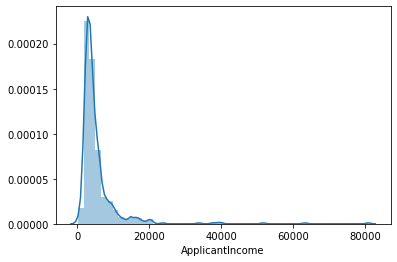

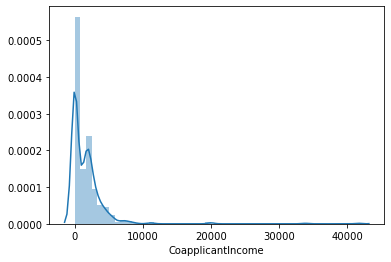

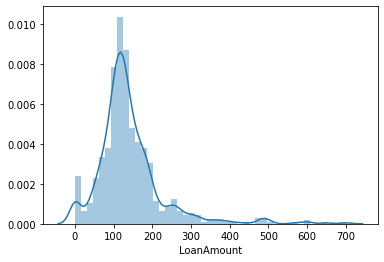

In [9]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

**Insights:**
- `As you can see all the three are skewed but we won't treat it as bank are supposed to have skewed applicants, If we treat the data here it will increase bias`

In [10]:
cr_df['Loan_Amount_Term'].value_counts(normalize=True)

# value counts gives us how many times does the value 

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

**Insights:**
- `Loan_Amount_Term most of the values are 360, and rest categories have a very small percentage. So it won't add much value to create dummies of these columns`

In [11]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [12]:
#Convert X & Y variable to a categorical variable wherever relevant
cr_df['Loan_Status'] = cr_df['Loan_Status'].astype('category')
cr_df['Credit_History'] = cr_df['Credit_History'].astype('category')

**Think about it:**

- We already know that the Dtype (data-type) of the columns, which of them are object or category type. Try to visualize it using countplot.

In [13]:
cr_df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount              int64
Credit_History       category
Property_Area          object
Loan_Status          category
dtype: object

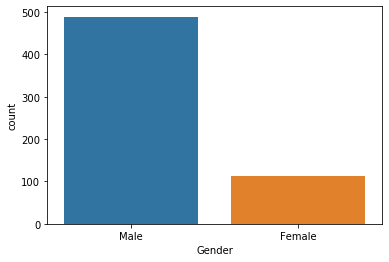

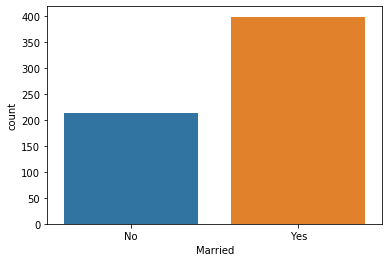

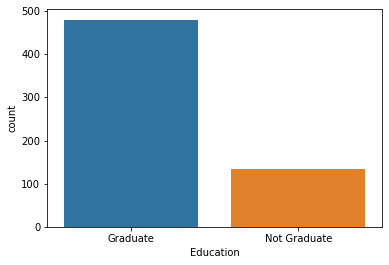

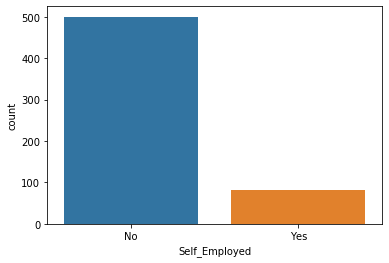

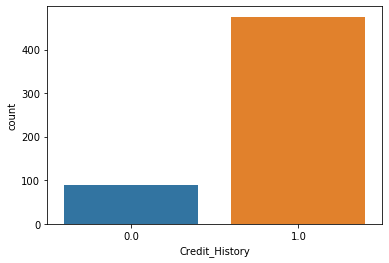

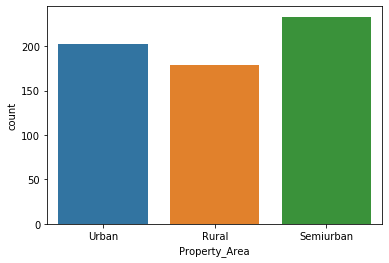

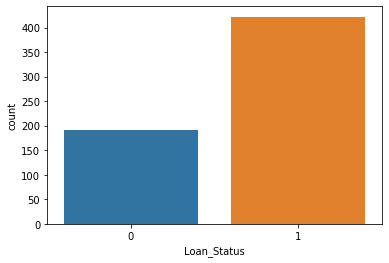

In [15]:
for i in ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(cr_df[i])
    plt.show()

In [16]:
for i in list(cr_df.columns[cr_df.dtypes=='object']):   # checking value counts of all object type columns
    print(cr_df[i].value_counts(normalize=True))
    print()

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64



In [17]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = cr_df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


**Insights:**
- `There is a slight imbalance in the data but no need to treat it`

## <a id = "link3"></a> Null Values Treatment

In [18]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Think about it:**

- How will try to fill these null values.
- Is it posiible to draw some relationship between features to fill null values.

In [19]:
#filling Null Values

cr_df['Credit_History'].fillna(0,inplace=True)

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

**Insights:**
- `Credit_History missing values are filled with 0 assuming that they don't meet credit history guidlines .`

- `Self_Employed missing values are replaced with mode, as maximum people are not self employed`

- `Dependents are also filled with mode, assuming most of the people do not have dependents`

In [20]:
# Drawing relationship between CoapplicantIncome and Gender

cr_df.groupby('Gender')['CoapplicantIncome'].median()

Gender
Female       0.0
Male      1430.0
Name: CoapplicantIncome, dtype: float64

**Insights:**
- `When CoapplicantIncome is 0 and Gender is Female we should fill it with 0.`

In [21]:
## Filling null values in gender whose CoapplicantIncome is 0 with female

z = cr_df[cr_df['CoapplicantIncome']==0]
z['Gender'] = z['Gender'].fillna('Female')

cr_df.update(z)

# .update() works on index values
# so all the value in cr_df will replaced by z values wherever the index value in cr_df are same to z

In [22]:
cr_df['Gender'].fillna('Male',inplace=True) #replacing remaining values with mode as no other relationship found

In [23]:
#Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [24]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816.0,754.0,160.0,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758.0,0.0,158.0,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047.0,0.0,0.0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [25]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [26]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## <a id = "link4"></a> Bivariate Analysis

**Think about it:**

- In this case-study, we are going to apply Logistic Regression.
- But even before we apply, let's have a look at the data to see how each attribute is different when loan status is yes or not.
- To check it, we ll have to use groupby and crosstabs.

In [27]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
cr_df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,0.505208
1,5384.068720,1504.516398,140.533175,0.895735


In [28]:
cr_df.groupby(["Loan_Status"]).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,3833.5,268.0,126.5,1.0
1,3812.5,1239.5,125.0,1.0


**Insights:**
- `No major difference in case of ApplicantIncome and LoanAmount values w.r.t. target variable`

- `But CoapplicantIncome is higher for people who take loan`

**Think about it**

- Please try to look at the outputs of the codes given below and see if there is any relationship or not

In [71]:
# pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

In [72]:
# pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

In [73]:
# pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

In [74]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [75]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


**Insights:**
- `Semi Urban people are taking more loans`

In [76]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Dependents,,
0,0.313889,0.686111
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


**Insights:**
- `Number of dependents have no relationship with Loan_status therfore Dependents is a nominal categorical variable`

## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [29]:
## Define X and Y variables

X = cr_df.drop('Loan_Status', axis=1)
Y = cr_df['Loan_Status'].astype('category')     

# change data typr to 'category' because it was object type which is not recognized by model

In [30]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

**Think about it**

- How does drop first help and why we do it
  - It reduces the number of columns and hence increases the computational time.

In [31]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

**Think about it**

- Why do we use random State
  - Sklearn randomly shuffles the data so we get a slightly different answer. If we fix the random state and re-run the code then all the scores will stay the same for that random state.
  - If we do not use random state our metrics will slightly differ in every run.

In [32]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=4294967295)

In [33]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [34]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221.0,0.0,60.0,0.0,1,1,0,0,0,0,0,0,1,0,0
109,2071.0,754.0,94.0,1.0,1,1,0,0,1,1,0,1,0,1,1
569,3166.0,2064.0,104.0,0.0,1,1,0,0,0,0,0,0,1,0,0
330,4384.0,1793.0,117.0,1.0,1,0,1,0,0,0,0,0,1,1,1
407,2213.0,0.0,66.0,1.0,0,0,0,0,0,1,0,0,0,1,1


In [35]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.7412587412587412

Testing accuracy 0.7567567567567568

Confusion Matrix


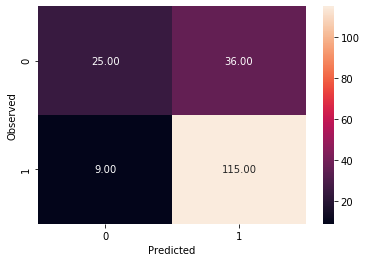

None

Recall: 0.9274193548387096

Precision: 0.7615894039735099

F1 Score: 0.8363636363636364

Roc Auc Score: 0.66862771020624


In [36]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

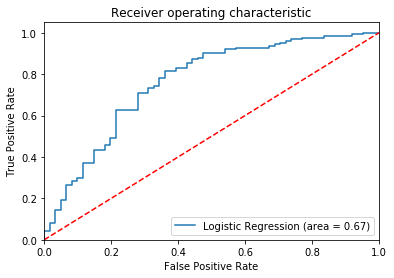

In [37]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
3,Credit_History,1.62
11,Property_Area_Semiurban,0.58
9,Education_Not Graduate,0.42
5,Married_Yes,0.26
4,Gender_Male,0.23
7,Dependents_2,0.23
6,Dependents_1,0.19
12,Property_Area_Urban,0.09
8,Dependents_3+,0.07
10,Self_Employed_Yes,0.04


## <a id = "link8"></a>Business Insights 

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that home loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that home loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that home loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that home loan will not be granted and the customer was eligibile for loan

##### `Important Features`

"Credit_History", "Married", "Property_Area_Semiurban", "Gender", "Dependents_2"

seems to be top 5 features which influence the model's output. Based on the coefficients value.

"ApplicantIncome", "CoapplicantIncome", "LoanAmount", and "Education_Not Graduate"

have coefficients value as 0 so these feature doesn't help model in predicting target variable.


##### `Important Metric`

Here the bank wants to give loan to the people who are eligible for the home loan i.e. **less number of False Positive**, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence **Precision is the important metric**.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers.

## Appendix:

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LogisticRegression** : Logistic Regression (aka logit, MaxEnt) classifier.

- **yellowbrick** : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it  uses Matplotlib